<a href="https://colab.research.google.com/github/TRANTHIMYTHUY/ML/blob/main/Lab_4_20130430_TranThiMyThuy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



In [3]:
# code
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/Machine Learning'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: '/content/drive/MyDrive/Machine Learning'
/content


# Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier





 

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy :  0.9130434782608695
Confusion Matrix : 
 [[ 5  0  0]
 [ 0  5  0]
 [ 0  2 11]]


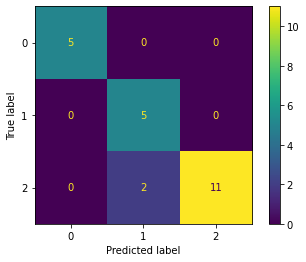

In [4]:
# code

dataset = datasets.load_iris()
X=dataset.data
y=dataset.target

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,  test_size = 0.15)
classifier = LogisticRegression(random_state = 0)
classifier.fit(Xtrain, ytrain)

y_pred = classifier.predict(Xtest)

cm = confusion_matrix(ytest, y_pred) 

print ("Accuracy : ", accuracy_score(ytest, y_pred))

cm = confusion_matrix(ytest, y_pred)

ConfusionMatrixDisplay.from_predictions(ytest, y_pred)
print ("Confusion Matrix : \n", cm)





#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



Test accuracy: 0.961
Confusion matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  0  0  0  1  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 45  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  4 36]]


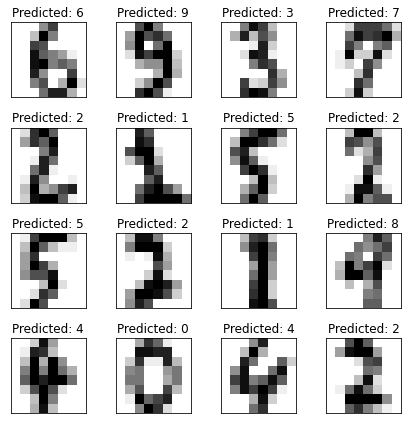

In [5]:

# Load dataset
mnist = datasets.load_digits()
X = mnist.data
y = mnist.target

# chia dữ liệu 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo và train LogisticRegression model
lr = LogisticRegression(solver='liblinear', multi_class='auto')
lr.fit(X_train, y_train)

# Đánh giá mô hình trên tập test
score = lr.score(X_test, y_test)
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(f'Test accuracy: {score:.3f}')
print('Confusion matrix:')
print(cm)


fig, axes = plt.subplots(4, 4, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(8, 8), cmap='binary')
    ax.set(title=f'Predicted: {y_pred[i]}', xticks=[], yticks=[])
plt.tight_layout()
plt.show()




#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


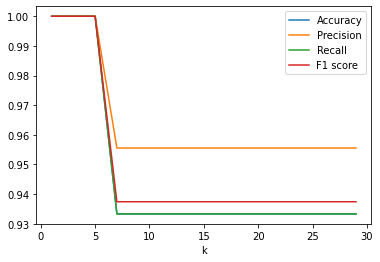

In [6]:
# # code
# K_range=range(1,20,2)
# accs=[]
# precess=[]
# recall=[]
# fas=[]
# for K in K_range:
#   KNM=KNeighborsClassifier(n_neighbors=K)
#   X_train, Xtest, y_train, ytest = train_test_split(X, y,  test_size = 0.2)
#   KNM.fit(X_train, y_train)
#   y_pred=KNM.predict(Xtest)
#   accs.append
#   plt.plot(K_range, accs)
#   plt.xlablel("k")

iris = datasets.load_iris()
X = iris.data
y = iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=37)


k_range = range(1, 30, 2)


accs = []
precisions = []
recalls = []
f1s = []


for k in k_range:

    knn = KNeighborsClassifier(n_neighbors=k)

   
    knn.fit(X_train, y_train)

    
    y_pred = knn.predict(X_test)

   
    accs.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_pred, average='weighted'))
    f1s.append(f1_score(y_test, y_pred, average='weighted'))

best_k = k_range[np.argmax(accs)]


plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, precisions, label='Precision')
plt.plot(k_range, recalls, label='Recall')
plt.plot(k_range, f1s, label='F1 score')
plt.xlabel('k')
plt.legend()
plt.show()







#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [ ]:
# code




mnist = load_digits()
X = mnist.data
y = mnist.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k_range = range(1, 30, 2)


accs = []
precisions = []
recalls = []
f1s = []


for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    accs.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, average='macro'))
    recalls.append(recall_score(y_test, y_pred, average='macro'))
    f1s.append(f1_score(y_test, y_pred, average='macro'))


best_k = k_range[np.argmax(scores)]

plt.plot(k_range, accs, label='Accuracy')
plt.plot(k_range, precisions, label='Precision')
plt.plot(k_range, recalls, label='Recall')
plt.plot(k_range, f1s, label='F1 score')
plt.xlabel('k')
plt.legend()
plt.show()

print(f"The best value of k is {best_k}")


#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [ ]:


data = pd.read_csv('spambase.csv')

X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data.iloc[:, -1], test_size=0.3, random_state=42)


dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
print('Decision Tree Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('k-Nearest Neighbors Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))


lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Logistic Regression Classifier')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))


#Finally,
Save a copy in your Github. Remember renaming the notebook.